In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy
from scipy import ndimage
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import random
import skimage
from scipy import misc , ndimage
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

In [2]:
Data = pd.read_csv('Large.csv', keep_default_na=False , na_values=[' '])

In [3]:
Data.head(20)

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,...,your_education,your_race,financial_status,US_State,Census_region,Region,Vaccine_Launch (PRE_POST),summary_explanation_of_research_timestamp,Knowledge_normalized,Perceived_threat_normalized
0,1.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,...,5.0,White,3.0,Florida,South Atlantic,South,No,5/30/2020 17:00,7.496125,4.871027
1,0.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,...,5.0,Asian,3.0,New York,Mid-Atlantic,Northeast,No,5/31/2020 7:16,NaN,3.947653
2,1.0,1.0,0.0,NaN,NaN,3.0,1,0,1,1,...,4.0,White,3.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:07,NaN,5.812587
3,1.0,0.0,NaN,NaN,NaN,6.0,0,1,0,1,...,2.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:44,6.246485,NaN
4,1.0,1.0,1.0,0.0,NaN,6.0,1,0,0,0,...,1.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 8:57,6.228922,5.329589
5,1.0,0.0,NaN,NaN,NaN,6.0,0,0,0,0,...,2.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 12:23,3.874650,1.603640
6,1.0,1.0,0.0,NaN,NaN,1.0,0,1,0,1,...,2.0,NaN,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,6/1/2020 12:45,6.584258,2.858823
7,0.0,0.0,NaN,NaN,NaN,2.0,1,1,1,1,...,5.0,Black,2.0,New Jersey,Mid-Atlantic,Northeast,No,6/1/2020 18:35,4.029918,0.687841
8,0.0,1.0,1.0,0.0,NaN,6.0,1,1,0,0,...,5.0,Black,2.0,Georgia,South Atlantic,South,No,6/1/2020 19:57,5.154715,8.649194
9,0.0,1.0,1.0,1.0,0.0,2.0,1,1,0,1,...,4.0,White,3.0,Michigan,East North Central,Midwest,No,6/1/2020 20:09,6.285938,6.750402


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   healthcare_worker                          2966 non-null   float64
 1   family_member_covid                        2706 non-null   float64
 2   family_member_covid_test                   772 non-null    float64
 3   fam_mem_covid_dx                           930 non-null    float64
 4   fm_mem_covid_hospitalized                  361 non-null    float64
 5   covid_follow                               2952 non-null   float64
 6   covid_information_source___1               2978 non-null   int64  
 7   covid_information_source___2               2978 non-null   int64  
 8   covid_information_source___3               2978 non-null   int64  
 9   covid_information_source___4               2978 non-null   int64  
 10  covid_information_source

In [5]:
total = Data.isnull().sum().sort_values(ascending=False)
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fm_mem_covid_hospitalized,2617,0.878778
family_member_covid_test,2206,0.740766
fam_mem_covid_dx,2048,0.687710
covid_vaccine_cause___3,1650,0.554063
covid_vaccine_cause___1,1650,0.554063
covid_vaccine_cause___2,1650,0.554063
covid_vaccine_cause___5,1650,0.554063
covid_vaccine_cause___4,1650,0.554063
Region,1364,0.458026
Knowledge_normalized,374,0.125588


In [6]:
#dropping Most NaN columns except of "your_race"
Data_New = Data.drop(['fm_mem_covid_hospitalized', 'family_member_covid_test', 'fam_mem_covid_dx', 'covid_vaccine_cause___4', 'covid_vaccine_cause___5', 'covid_vaccine_cause___3', 'covid_vaccine_cause___2', 'covid_vaccine_cause___1', 'Region', 'Knowledge_normalized', 'Perceived_threat_normalized', 'child', 'baby_wipes', 'hot_beverages', 'Census_region', 'US_State', 'nasal_spray', 'summary_explanation_of_research_timestamp', 'Perceived_threat_normalized', 'Knowledge_normalized'], axis=1)
Data_New.head(10)

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch (PRE_POST)
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,4.0,1,1.0,9.0,Female,4.0,5.0,White,3.0,No
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,1,1.0,8.0,Male,2.0,5.0,Asian,3.0,No
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,4.0,1,1.0,10.0,Female,3.0,4.0,White,3.0,No
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,1.0,0,1.0,8.0,Female,2.0,2.0,White,2.0,No
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,0,1.0,9.0,Female,2.0,1.0,White,2.0,No
5,1.0,0.0,6.0,0,0,0,0,0.0,0,1,...,4.0,1,1.0,8.0,Female,5.0,2.0,White,2.0,No
6,1.0,1.0,1.0,0,1,0,1,1.0,0,1,...,4.0,0,1.0,8.0,Male,2.0,2.0,NaN,2.0,No
7,0.0,0.0,2.0,1,1,1,1,0.0,0,1,...,4.0,0,1.0,9.0,Male,2.0,5.0,Black,2.0,No
8,0.0,1.0,6.0,1,1,0,0,1.0,0,1,...,3.0,0,0.0,10.0,Female,3.0,5.0,Black,2.0,No
9,0.0,1.0,2.0,1,1,0,1,1.0,0,1,...,3.0,1,1.0,7.0,Male,3.0,4.0,White,3.0,No


In [8]:
Data_New.describe()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,vent,administration,new_vaccine,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,your_age,your_education,financial_status
count,2966.000000,2706.000000,2952.000000,2978.000000,2978.000000,2978.000000,2978.000000,2977.000000,2978.000000,2978.000000,...,2959.000000,2963.000000,2951.000000,2929.000000,2978.000000,2976.00000,2969.000000,2962.000000,2946.000000,2968.000000
mean,0.182738,0.287140,4.175136,0.665883,0.394224,0.299194,0.603089,0.236816,0.011081,0.659167,...,3.482595,3.046574,1.851915,3.254012,0.810611,0.85047,8.429101,3.055030,3.016972,2.147574
std,0.386516,0.452511,1.867561,0.471760,0.488766,0.457982,0.489339,0.425200,0.104700,0.474069,...,1.050911,1.397834,0.948198,0.943234,0.391883,0.35667,1.392041,1.150896,1.262110,0.675879
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,3.000000,1.000000,1.00000,8.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,3.000000,2.000000,4.000000,1.000000,1.00000,9.000000,3.000000,3.000000,2.000000
75%,0.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,3.000000,4.000000,1.000000,1.00000,9.000000,4.000000,4.000000,3.000000
max,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,4.000000,4.000000,1.000000,1.00000,10.000000,5.000000,5.000000,4.000000


In [9]:
#get the frequent value for each column
Data_New.mode()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,new_medication,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch (PRE_POST)
0,0.0,0.0,6.0,1,0,0,1,0.0,0,1,...,4.0,1,1.0,8.0,Female,2.0,2.0,White,2.0,Yes


In [10]:
Data_New.describe(include=['O'])

,Gender_string,your_race,Vaccine_Launch (PRE_POST)
count,2934,2874,2978
unique,2,5,2
top,Female,White,Yes
freq,2215,2217,2459


In [11]:
Data_New.describe(include=['O'])

,Gender_string,your_race,Vaccine_Launch (PRE_POST)
count,2934,2874,2978
unique,2,5,2
top,Female,White,Yes
freq,2215,2217,2459


In [12]:
Data_New = Data_New.rename(columns = {"Vaccine_Launch (PRE_POST)":"Vaccine_Launch"})

In [13]:
Data_New.describe(include=['O'])

,Gender_string,your_race,Vaccine_Launch
count,2934,2874,2978
unique,2,5,2
top,Female,White,Yes
freq,2215,2217,2459


In [14]:
Data_New['your_race'].fillna('White', inplace=True)
Data_New['Gender_string'].fillna('Female', inplace=True)
Data_New['Vaccine_Launch'].fillna('Yes', inplace=True)

In [15]:
Data_New['Gender'] = pd.Series(len(Data_New['Gender_string']), index=Data_New.index)
Data_New['Gender'] = 0 
Data_New.loc[Data_New['Gender_string']== 'Male','Gender'] = 0
Data_New.loc[Data_New['Gender_string']== 'Female','Gender'] = 1
Data_New.head()
Data_New.tail()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,covid_vaccine,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,Vaccine_Launch,Gender
2973,0.0,NaN,4.0,0,1,0,0,0.0,0,0,...,1,1.0,6.0,Male,2.0,2.0,White,2.0,Yes,0
2974,0.0,0.0,6.0,0,1,0,1,0.0,0,1,...,1,1.0,8.0,Female,3.0,2.0,White,2.0,Yes,1
2975,0.0,NaN,3.0,1,1,1,1,0.0,0,0,...,1,1.0,9.0,Male,4.0,2.0,Black,2.0,Yes,0
2976,1.0,NaN,3.0,1,0,0,1,0.0,0,1,...,1,1.0,9.0,Male,4.0,4.0,White,2.0,Yes,0
2977,0.0,1.0,6.0,1,0,0,0,0.0,0,0,...,1,1.0,9.0,Female,5.0,NaN,White,2.0,Yes,1


In [16]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(Data_New, prefix=['your_race'], columns=['your_race'] , dtype=int)

In [17]:
final['VaccineLaunch'] = pd.Series(len(final['Vaccine_Launch']), index=final.index)
final['VaccineLaunch'] = 0
final.loc[final['Vaccine_Launch']== 'No','VaccineLaunch'] = 0
final.loc[final['Vaccine_Launch']== 'Yes','VaccineLaunch'] = 1
final.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_education,financial_status,Vaccine_Launch,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,5.0,3.0,No,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,5.0,3.0,No,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,4.0,3.0,No,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,No,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,1.0,2.0,No,1,0,0,0,0,1,0


In [18]:
Data_N = final.drop(['Vaccine_Launch', 'Gender_string'], axis=1)

In [19]:
Data_N.head()

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,NaN,0,1,...,4.0,5.0,3.0,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,5.0,3.0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,1,0,0,0,0,1,0


In [21]:
Data_N.columns

Index(['healthcare_worker', 'family_member_covid', 'covid_follow',
       'covid_information_source___1', 'covid_information_source___2',
       'covid_information_source___3', 'covid_information_source___4',
       'covid_information_source___5', 'covid_information_source___6',
       'covid_information_source___7', 'covid_information_source___8',
       'covid_information_source___9', 'covid_information_source___10',
       'confine', 'job', 'infection', 'food', 'death', 'hospital_access',
       'covid_state', 'sd', 'ld', 'hw', 'fm', 'er', 'reopening', 'second_wave',
       'number', 'state', 'belief', 'age', 'smoke', 'dm', 'immune', 'pregnant',
       'hosp_rate', 'death_rate', 'incubation', 'corona', 'animal',
       'screening', 'hand_wash', 'climate', 'sunlight', 'hand_sanitize',
       'covid_symptoms___1', 'covid_symptoms___2', 'covid_symptoms___3',
       'covid_symptoms___4', 'covid_symptoms___5', 'vaccine_pcv_flu',
       'mask_gloves___1', 'mask_gloves___2', 'social_distan

In [22]:
#filling Nan values by most frequent value for each column
##iloc(0) means put the value in mode() which present most frequent value for each column
cols = ["healthcare_worker", "family_member_covid", "covid_follow",
       "covid_information_source___1", "covid_information_source___2",
       "covid_information_source___3", "covid_information_source___4",
       "covid_information_source___5", "covid_information_source___6",
       "covid_information_source___7", "covid_information_source___8",
       "covid_information_source___9", "covid_information_source___10",
       "confine", "job", "infection", "food", "death", "hospital_access",
       "covid_state", "sd", "ld", "hw", "fm", "er", "reopening", "second_wave",
       "number", "state", "belief", "age", "smoke", "dm", "immune",
       "hosp_rate", "death_rate", "incubation", "corona", "animal",
       "screening", "hand_wash", "climate", "sunlight", "hand_sanitize",
       "covid_symptoms___1", "covid_symptoms___2", "covid_symptoms___3",
       "covid_symptoms___4", "covid_symptoms___5", "vaccine_pcv_flu",
       "mask_gloves___1", "mask_gloves___2", "social_distance_feet",
       "isolation", "corona_live", "spread___1", "spread___2", "spread___3",
       "spread___4", "chloroquin", "drug_trial", "vaccine_trial", "hospital",
       "vent", "administration", "new_vaccine", "new_medication",
       "covid_vaccine", "flu_shot_y_n", "confidence_level", "your_age",
       "your_education", "financial_status", "Gender", "your_race_White","your_race_Asian","your_race_Hispanic","your_race_Black","your_race_Other",
       "VaccineLaunch"]
Data_N[cols]=Data_N[cols].fillna(Data_N.mode().iloc[0])

In [23]:
Data_N.head(10)

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,0.0,0,1,...,4.0,5.0,3.0,1,0,0,0,0,1,0
1,0.0,0.0,5.0,1,0,0,1,0.0,0,0,...,2.0,5.0,3.0,0,1,0,0,0,0,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,1,0,0,0,0,1,0
5,1.0,0.0,6.0,0,0,0,0,0.0,0,1,...,5.0,2.0,2.0,1,0,0,0,0,1,0
6,1.0,1.0,1.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,0,0,0,0,0,1,0
7,0.0,0.0,2.0,1,1,1,1,0.0,0,1,...,2.0,5.0,2.0,0,0,1,0,0,0,0
8,0.0,1.0,6.0,1,1,0,0,1.0,0,1,...,3.0,5.0,2.0,1,0,1,0,0,0,0
9,0.0,1.0,2.0,1,1,0,1,1.0,0,1,...,3.0,4.0,3.0,0,0,0,0,0,1,0


In [25]:
Data_NN = Data_N.dropna()

In [26]:
Data_NN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2977
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   healthcare_worker              2867 non-null   float64
 1   family_member_covid            2867 non-null   float64
 2   covid_follow                   2867 non-null   float64
 3   covid_information_source___1   2867 non-null   int64  
 4   covid_information_source___2   2867 non-null   int64  
 5   covid_information_source___3   2867 non-null   int64  
 6   covid_information_source___4   2867 non-null   int64  
 7   covid_information_source___5   2867 non-null   float64
 8   covid_information_source___6   2867 non-null   int64  
 9   covid_information_source___7   2867 non-null   int64  
 10  covid_information_source___8   2867 non-null   int64  
 11  covid_information_source___9   2867 non-null   int64  
 12  covid_information_source___10  2867 non-null   i

In [27]:
X = Data_NN.drop(['covid_vaccine'], axis=1)
y = Data_NN["covid_vaccine"]

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30 , shuffle= True)

In [28]:
Data_NN

,healthcare_worker,family_member_covid,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,...,your_age,your_education,financial_status,Gender,your_race_Asian,your_race_Black,your_race_Hispanic,your_race_Other,your_race_White,VaccineLaunch
0,1.0,0.0,5.0,1,0,0,1,0.0,0,1,...,4.0,5.0,3.0,1,0,0,0,0,1,0
2,1.0,1.0,3.0,1,0,1,1,0.0,0,0,...,3.0,4.0,3.0,1,0,0,0,0,1,0
3,1.0,0.0,6.0,0,1,0,1,1.0,0,1,...,2.0,2.0,2.0,1,0,0,0,0,1,0
4,1.0,1.0,6.0,1,0,0,0,1.0,0,0,...,2.0,1.0,2.0,1,0,0,0,0,1,0
5,1.0,0.0,6.0,0,0,0,0,0.0,0,1,...,5.0,2.0,2.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,0.0,0.0,4.0,0,1,0,0,0.0,0,0,...,2.0,2.0,2.0,0,0,0,0,0,1,1
2974,0.0,0.0,6.0,0,1,0,1,0.0,0,1,...,3.0,2.0,2.0,1,0,0,0,0,1,1
2975,0.0,0.0,3.0,1,1,1,1,0.0,0,0,...,4.0,2.0,2.0,0,0,1,0,0,0,1
2976,1.0,0.0,3.0,1,0,0,1,0.0,0,1,...,4.0,4.0,2.0,0,0,0,0,0,1,1


In [29]:
#### Without dimensional reduction##############

In [30]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

85.02

In [31]:
#####MRMR########

In [32]:
SF = mrmr_classif(X, y, K = 8)

In [33]:
SF

['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin']

In [34]:
DF= Data_NN[['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin']]

In [35]:
DF.shape

(2867, 8)

In [36]:
X_train_DF, X_test_DF, y_train, y_test = train_test_split(DF, y, test_size = 0.3, random_state=20, stratify=y)

In [37]:
knn_MRMR = KNeighborsClassifier(7)
knn_MRMR.fit(X_train_DF,y_train)
print("Test score after MRMR",knn_MRMR.score(X_test_DF,y_test),"%")

Test score after MRMR 0.8490127758420442 %


In [38]:
#K=9

In [39]:
SF = mrmr_classif(X, y, K = 9)

In [40]:
SF

['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin',
 'ld']

In [41]:
DF= Data_NN[['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin',
 'ld']]

In [42]:
DF.shape

(2867, 9)

In [43]:
X_train_DF, X_test_DF, y_train, y_test = train_test_split(DF, y, test_size = 0.3, random_state=20, stratify=y)

In [44]:
knn_MRMR = KNeighborsClassifier(7)
knn_MRMR.fit(X_train_DF,y_train)
print("Test score after MRMR",knn_MRMR.score(X_test_DF,y_test),"%")
##

Test score after MRMR 0.8583042973286876 %


In [45]:
#K=10

In [46]:
SF = mrmr_classif(X, y, K = 10)

In [47]:
SF

['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin',
 'ld',
 'financial_status']

In [48]:
DF= Data_NN[['vaccine_trial',
 'corona',
 'infection',
 'flu_shot_y_n',
 'sd',
 'drug_trial',
 'fm',
 'chloroquin',
 'ld',
 'financial_status']]

In [49]:
DF.shape

(2867, 10)

In [50]:
X_train_DF, X_test_DF, y_train, y_test = train_test_split(DF, y, test_size = 0.3, random_state=20, stratify=y)

In [51]:
knn_MRMR = KNeighborsClassifier(7)
knn_MRMR.fit(X_train_DF,y_train)
print("Test score after MRMR",knn_MRMR.score(X_test_DF,y_test),"%")

Test score after MRMR 0.851335656213705 %


In [52]:
#####ReliefF########

In [53]:
from ReliefF import ReliefF

fs = ReliefF(n_neighbors=3, n_features_to_keep=8)
features = fs.fit_transform(Data_NN.drop(['covid_vaccine'], axis=1).to_numpy(), Data_NN['covid_vaccine'].to_numpy()).T

In [54]:
fs

In [55]:
columns = Data_NN.drop(['covid_vaccine'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (Data_NN.drop(['covid_vaccine'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['hand_wash', 'spread___2', 'covid_information_source___6', 'covid_symptoms___3', 'covid_symptoms___1', 'immune', 'age', 'social_distance_feet']


In [56]:
features.shape

(8, 2867)

In [57]:
y.shape

(2867,)

In [58]:
features1 = features.transpose()

In [59]:
features1

array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [60]:
X_train_features1, X_test_features1, y_train, y_test = train_test_split(features1, y, test_size = 0.3, random_state=20, stratify=y)

In [61]:
knn_ReliefF = KNeighborsClassifier(7)
knn_ReliefF.fit(X_train_features1,y_train)
print("Test score after ReliefF",knn_ReliefF.score(X_test_features1,y_test),"%")

Test score after ReliefF 0.8083623693379791 %


In [62]:
#K=9

In [63]:
from ReliefF import ReliefF

fs = ReliefF(n_neighbors=3, n_features_to_keep=9)
features = fs.fit_transform(Data_NN.drop(['covid_vaccine'], axis=1).to_numpy(), Data_NN['covid_vaccine'].to_numpy()).T

In [64]:
columns = Data_NN.drop(['covid_vaccine'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (Data_NN.drop(['covid_vaccine'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['hand_wash', 'spread___2', 'covid_information_source___6', 'covid_symptoms___3', 'covid_symptoms___1', 'immune', 'age', 'social_distance_feet', 'covid_symptoms___2']


In [65]:
features.shape

(9, 2867)

In [66]:
y.shape

(2867,)

In [67]:
features1 = features.transpose()

In [68]:
features1

array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.]])

In [69]:
X_train_features1, X_test_features1, y_train, y_test = train_test_split(features1, y, test_size = 0.3, random_state=20, stratify=y)

In [70]:
knn_ReliefF = KNeighborsClassifier(7)
knn_ReliefF.fit(X_train_features1,y_train)
print("Test score after ReliefF",knn_ReliefF.score(X_test_features1,y_test),"%")

Test score after ReliefF 0.8083623693379791 %


In [71]:
#####PCA########

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [73]:
pca.get_covariance()

array([[ 1.50960554e-01,  1.53197915e-02, -3.63958231e-02, ...,
         4.89970453e-04, -2.94079633e-03, -2.32050786e-02],
       [ 1.53197915e-02,  1.93397885e-01, -7.77551224e-03, ...,
         2.10835771e-03, -4.02844311e-03,  2.23358861e-03],
       [-3.63958231e-02, -7.77551224e-03,  3.50336249e+00, ...,
        -8.47054981e-03, -2.07464638e-03,  1.83221688e-03],
       ...,
       [ 4.89970453e-04,  2.10835771e-03, -8.47054981e-03, ...,
         4.07566332e-02, -3.33031432e-02,  4.19444403e-03],
       [-2.94079633e-03, -4.02844311e-03, -2.07464638e-03, ...,
        -3.33031432e-02,  1.70337388e-01, -6.11258221e-03],
       [-2.32050786e-02,  2.23358861e-03,  1.83221688e-03, ...,
         4.19444403e-03, -6.11258221e-03,  1.42666106e-01]])

In [74]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.55355639e-01, 9.92010285e-02, 7.26839738e-02, 7.02232043e-02,
       4.61929144e-02, 4.17663651e-02, 3.75847337e-02, 3.35013209e-02,
       3.14052353e-02, 2.80156125e-02, 2.52275291e-02, 2.40987920e-02,
       2.06694121e-02, 2.02696000e-02, 1.97427933e-02, 1.75309184e-02,
       1.68043481e-02, 1.51918064e-02, 1.44755731e-02, 1.40305734e-02,
       1.20062557e-02, 1.10728799e-02, 9.79131634e-03, 8.78498614e-03,
       8.17375060e-03, 7.79006592e-03, 6.86246163e-03, 6.62819008e-03,
       6.24911076e-03, 5.64142911e-03, 5.46409449e-03, 5.18496534e-03,
       4.87250127e-03, 4.67230395e-03, 4.54424057e-03, 4.46940599e-03,
       4.27616450e-03, 4.18069951e-03, 4.01676040e-03, 3.91968249e-03,
       3.86379664e-03, 3.72807358e-03, 3.60988363e-03, 3.58428859e-03,
       3.47649791e-03, 3.18903986e-03, 3.01903064e-03, 2.91886021e-03,
       2.84450477e-03, 2.71236770e-03, 2.63575247e-03, 2.57472800e-03,
       2.45227775e-03, 2.44293906e-03, 2.40375370e-03, 2.29479952e-03,
      

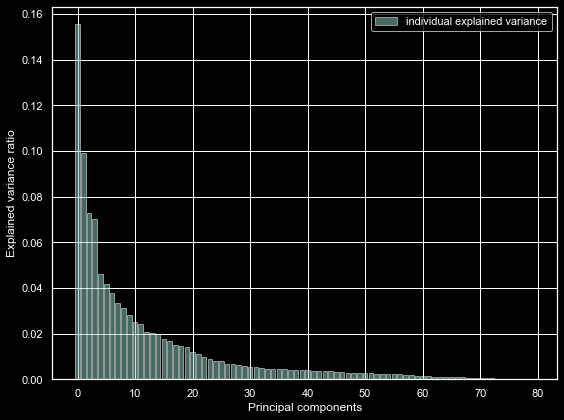

In [75]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(80), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [76]:
pca=PCA(n_components=30)
X_new=pca.fit_transform(X)

In [77]:
X_new

array([[-0.57125964, -1.61542641,  0.2200368 , ...,  0.26687668,
         0.18094621, -0.20764696],
       [ 1.49563143, -1.13554205, -0.20195577, ..., -0.11162397,
         0.06412333, -0.56230998],
       [ 4.09991106,  5.04537628, -0.07276564, ..., -0.04093441,
        -0.9288002 ,  0.13223622],
       ...,
       [ 3.09138084, -2.16923266, -1.63918864, ...,  0.68000399,
        -0.43538737,  0.21893395],
       [ 2.49998037,  0.03697932, -3.3343937 , ..., -0.40559742,
         0.1878016 ,  0.17170517],
       [ 4.48850305, -1.59147724,  0.34471617, ..., -0.64090164,
         0.07545317, -0.76125474]])

In [78]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [79]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Test score after PCA 0.8292682926829268 %
